## importar librerias

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Cargar y analizar

In [16]:
df = pd.read_csv('clientes_banco_aprobacion.csv')

In [17]:
df.head()

,Customer_ID,Age,Education_Level,Marital_Status,Family_Size,Income_Category,Occupation,Years_Employed,Annual_Income,Has_Car,Housing,Approved
0,5008804,32,Higher education,Union-stable,2,Employee,Other,12,427500.0,1,Rented apartment,1
1,5008805,32,Higher education,Union-stable,2,Employee,Other,12,427500.0,1,Rented apartment,1
2,5008806,58,High school,Married,2,Employee,Security,3,112500.0,1,Own house/apartment,0
3,5008808,52,High school,Single,1,Business associate,Sales,8,270000.0,0,Own house/apartment,1
4,5008809,52,High school,Single,1,Business associate,Sales,8,270000.0,0,Own house/apartment,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438463 entries, 0 to 438462
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Customer_ID      438463 non-null  int64  
 1   Age              438463 non-null  int64  
 2   Education_Level  438463 non-null  object 
 3   Marital_Status   438463 non-null  object 
 4   Family_Size      438463 non-null  int64  
 5   Income_Category  438463 non-null  object 
 6   Occupation       438463 non-null  object 
 7   Years_Employed   438463 non-null  int64  
 8   Annual_Income    438463 non-null  float64
 9   Has_Car          438463 non-null  int64  
 10  Housing          438463 non-null  object 
 11  Approved         438463 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 40.1+ MB


In [19]:
df.describe()

,Customer_ID,Age,Family_Size,Years_Employed,Annual_Income,Has_Car,Approved
count,4.384630e+05,438463.000000,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,6.021894e+06,43.295865,2.194461,5.531215,1.875220e+05,0.371906,0.613776
std,5.713554e+05,11.459616,0.897194,6.492446,1.100832e+05,0.483314,0.486884
min,5.008804e+06,20.000000,1.000000,0.000000,2.610000e+04,0.000000,0.000000
25%,5.609340e+06,34.000000,2.000000,1.000000,1.215000e+05,0.000000,0.000000
50%,6.047690e+06,42.000000,2.000000,4.000000,1.611000e+05,0.000000,1.000000
75%,6.454118e+06,53.000000,3.000000,8.000000,2.250000e+05,1.000000,1.000000
max,7.999952e+06,68.000000,20.000000,47.000000,6.750000e+06,1.000000,1.000000


In [20]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Education_Level', 'Marital_Status', 'Income_Category', 'Occupation', 'Housing']
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438463 entries, 0 to 438462
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Customer_ID      438463 non-null  int64  
 1   Age              438463 non-null  int64  
 2   Education_Level  438463 non-null  int64  
 3   Marital_Status   438463 non-null  int64  
 4   Family_Size      438463 non-null  int64  
 5   Income_Category  438463 non-null  int64  
 6   Occupation       438463 non-null  int64  
 7   Years_Employed   438463 non-null  int64  
 8   Annual_Income    438463 non-null  float64
 9   Has_Car          438463 non-null  int64  
 10  Housing          438463 non-null  int64  
 11  Approved         438463 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 40.1 MB


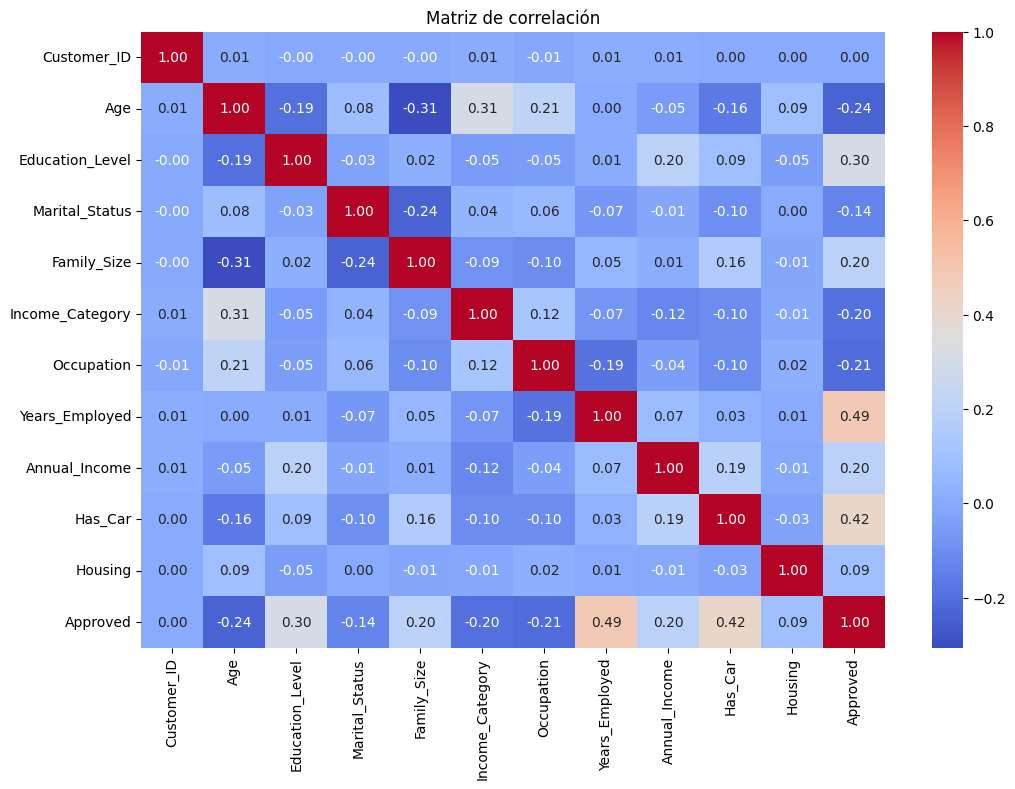

In [22]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

#### Database normalizada

In [23]:
df_norm = pd.read_csv('clientes_banco_aprobacion_numerico.csv')

In [41]:
df_norm.head()

,Customer_ID,Age,Education_Level,Marital_Status,Family_Size,Income_Category,Occupation,Years_Employed,Annual_Income,Has_Car,Housing,Approved
0,5008804,32,2,3,2,1,12,0.255319,0.059697,1,5,1
1,5008805,32,2,3,2,1,12,0.255319,0.059697,1,5,1
2,5008806,58,1,1,2,1,17,0.063830,0.012850,1,3,0
3,5008808,52,1,2,1,0,15,0.170213,0.036274,0,3,1
4,5008809,52,1,2,1,0,15,0.170213,0.036274,0,3,1


In [24]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438463 entries, 0 to 438462
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Customer_ID      438463 non-null  int64  
 1   Age              438463 non-null  int64  
 2   Education_Level  438463 non-null  int64  
 3   Marital_Status   438463 non-null  int64  
 4   Family_Size      438463 non-null  int64  
 5   Income_Category  438463 non-null  int64  
 6   Occupation       438463 non-null  int64  
 7   Years_Employed   438463 non-null  float64
 8   Annual_Income    438463 non-null  float64
 9   Has_Car          438463 non-null  int64  
 10  Housing          438463 non-null  int64  
 11  Approved         438463 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 40.1 MB


In [25]:
df_norm.describe()

,Customer_ID,Age,Education_Level,Marital_Status,Family_Size,Income_Category,Occupation,Years_Employed,Annual_Income,Has_Car,Housing,Approved
count,4.384630e+05,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000
mean,6.021894e+06,43.295865,1.328589,1.365043,2.194461,1.107578,8.163234,0.117685,0.024007,0.371906,2.982318,0.613776
std,5.713554e+05,11.459616,0.557746,0.889852,0.897194,0.848961,5.048894,0.138137,0.016372,0.483314,0.473909,0.486884
min,5.008804e+06,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.609340e+06,34.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.021277,0.014188,0.000000,3.000000,0.000000
50%,6.047690e+06,42.000000,1.000000,1.000000,2.000000,1.000000,10.000000,0.085106,0.020078,0.000000,3.000000,1.000000
75%,6.454118e+06,53.000000,2.000000,2.000000,3.000000,2.000000,12.000000,0.170213,0.029581,1.000000,3.000000,1.000000
max,7.999952e+06,68.000000,4.000000,4.000000,20.000000,4.000000,18.000000,1.000000,1.000000,1.000000,5.000000,1.000000


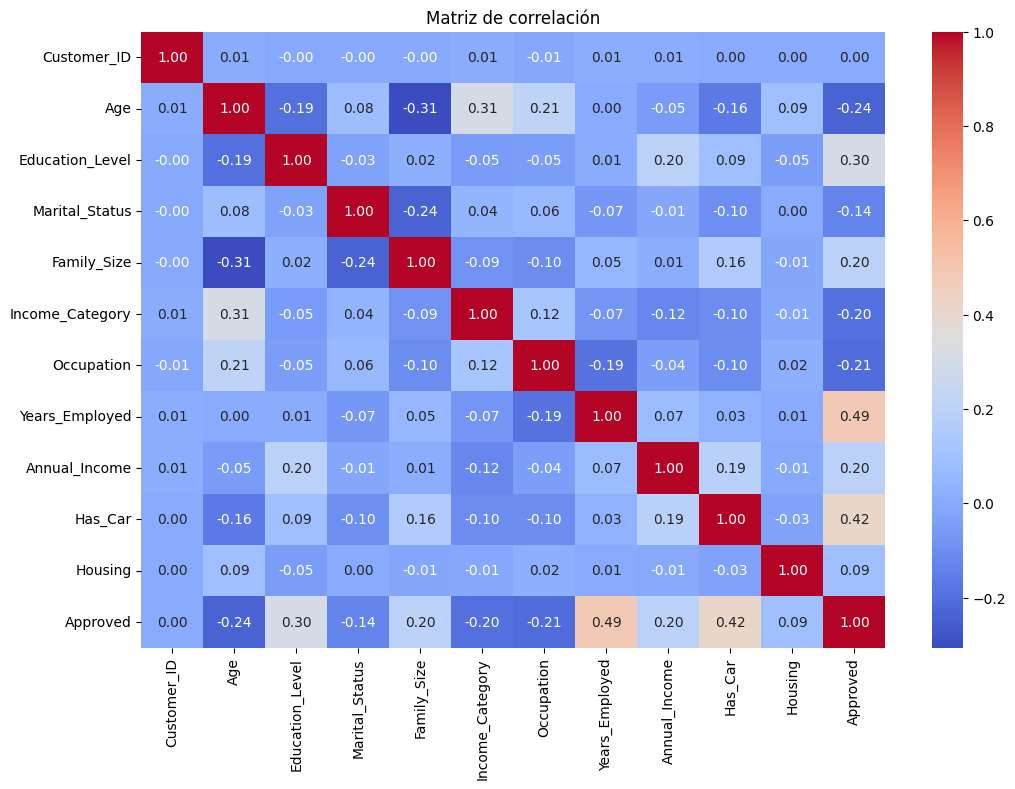

In [26]:
plt.figure(figsize=(12, 8))
corr_matrix = df_norm.corr()
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [39]:
comparison_df = pd.DataFrame({
    'df': corr_df,
    'df_norm': corr_df_norm
})
display(comparison_df)


,df,df_norm
Customer_ID,0.003243,0.003243
Age,-0.236318,-0.236318
Education_Level,0.301760,0.301760
Marital_Status,-0.135655,-0.135655
Family_Size,0.196760,0.196760
Income_Category,-0.197357,-0.197357
Occupation,-0.208728,-0.208728
Years_Employed,0.485090,0.485090
Annual_Income,0.198666,0.198666
Has_Car,0.417138,0.417138


### Crear el modelo de Random Forest

In [43]:
# Separar características y variable objetivo, excluyendo 'Customer_ID'
X = df.drop(['Customer_ID', 'Approved'], axis=1)
y = df['Approved']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Crear y entrenar el modelo de Random Forest con hiperparámetros
rf_model = RandomForestClassifier(
    n_estimators=100,        # número de árboles
    max_depth=10,            # profundidad máxima de cada árbol
    min_samples_split=5,     # mínimo de muestras para dividir un nodo
    min_samples_leaf=2,      # mínimo de muestras en una hoja
    random_state=42
)

In [45]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [46]:
# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Random Forest: {accuracy:.4f}')

Precisión del modelo Random Forest: 0.9999



Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33831
           1       1.00      1.00      1.00     53862

    accuracy                           1.00     87693
   macro avg       1.00      1.00      1.00     87693
weighted avg       1.00      1.00      1.00     87693



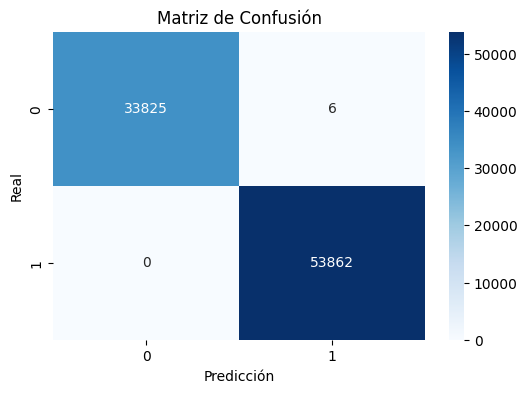

In [47]:
# Reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV  # Importa GridSearchCV para búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],              # Define los valores a probar para el número de árboles
    'max_depth': [5, 10, 15],                    # Define las profundidades máximas a probar
    'min_samples_split': [2, 5],                 # Define los valores para el mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2]                   # Define los valores para el mínimo de muestras en una hoja
}
grid_search_rf_prueba = GridSearchCV(
    estimator=RandomForestClassifier(),          # Usa RandomForestClassifier como estimador base
    param_grid=param_grid,                       # Usa la grilla de hiperparámetros definida arriba
    scoring='accuracy',                          # Evalúa los modelos usando la métrica de accuracy
    cv=3,                                        # Usa validación cruzada de 3 particiones
    verbose=2,                                   # Muestra información detallada del proceso
    n_jobs=-1                                    # Usa todos los núcleos disponibles para acelerar el proceso
)
grid_search_rf_prueba.fit(X_train, y_train)      # Ajusta el modelo con los datos de entrenamiento y busca la mejor combinación de hiperparámetros

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

El modelo de Random Forest entrenado muestra una precisión extremadamente alta (99.99%) en el conjunto de prueba, lo que indica que es capaz de predecir con gran exactitud la aprobación de clientes. Sin embargo, este nivel de precisión podría sugerir un posible sobreajuste, por lo que es recomendable analizar más a fondo el comportamiento del modelo y validar con otros conjuntos de datos o métricas adicionales. La búsqueda de hiperparámetros con GridSearchCV ayuda a optimizar el rendimiento del modelo, seleccionando la mejor combinación de parámetros para la tarea.

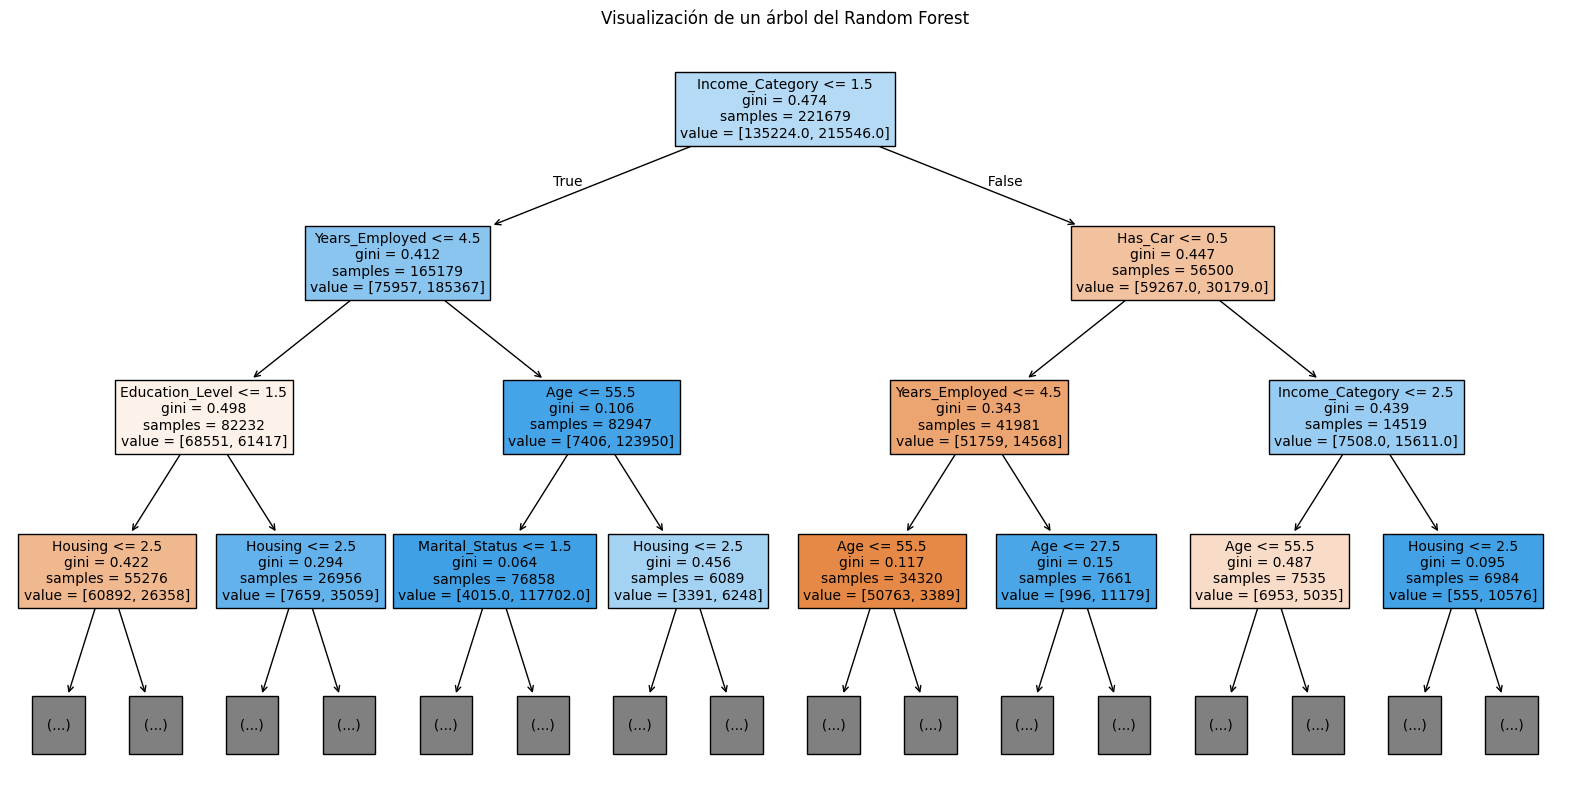

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Visualización de un árbol del Random Forest")
plt.show()

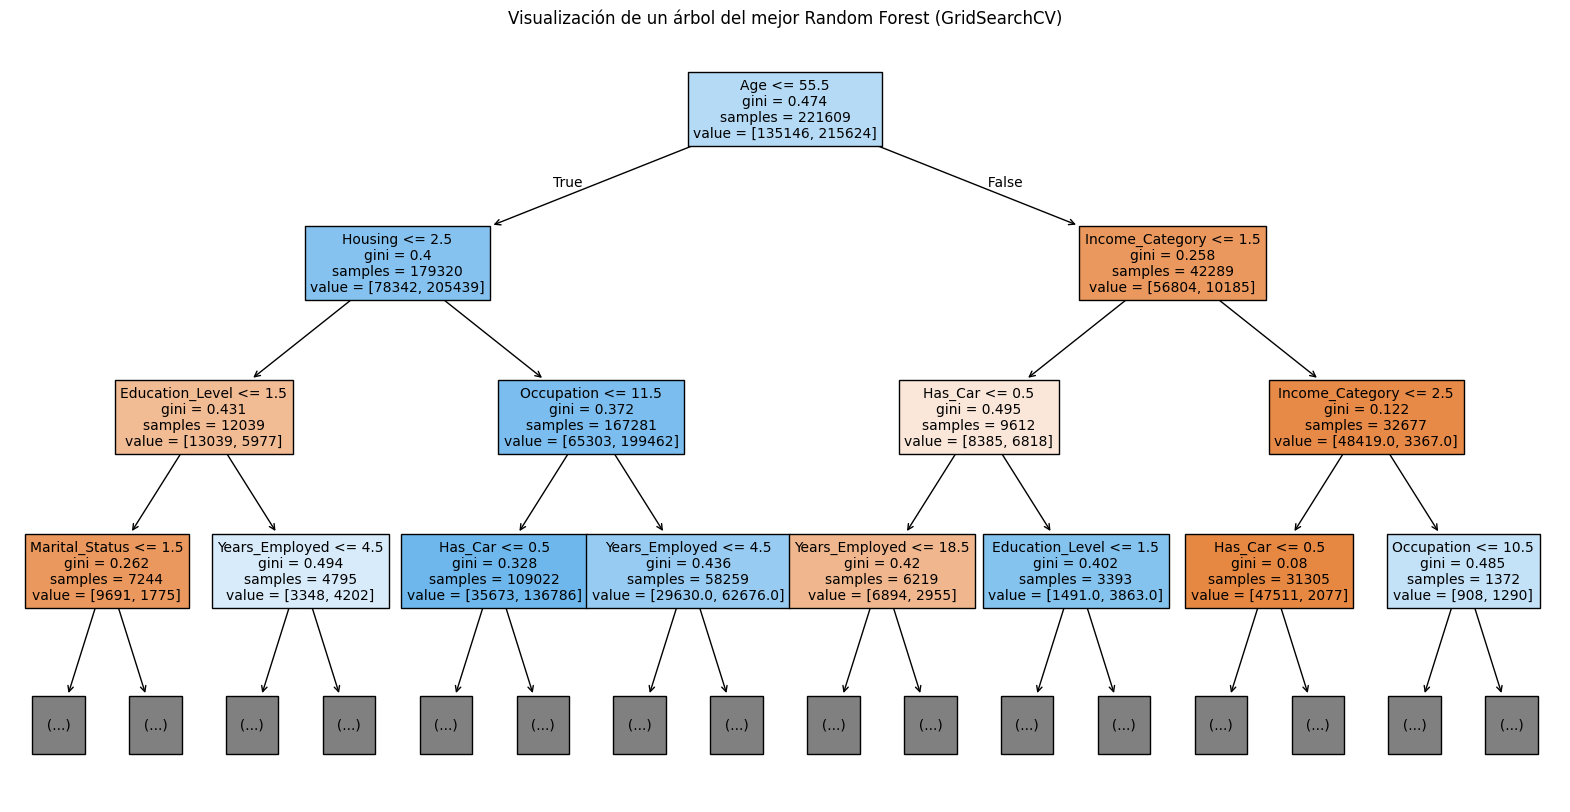

In [53]:
plt.figure(figsize=(20, 10))
plot_tree(grid_search_rf_prueba.best_estimator_.estimators_[0], feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Visualización de un árbol del mejor Random Forest (GridSearchCV)")
plt.show()


In [54]:
import joblib

# Guardar el modelo RandomForest entrenado manualmente
joblib.dump(rf_model, 'rf_model.pkl')

# Guardar el mejor modelo encontrado por GridSearchCV
joblib.dump(grid_search_rf_prueba.best_estimator_, 'best_rf_model_gridsearch.pkl')

['best_rf_model_gridsearch.pkl']